<a href="https://colab.research.google.com/github/senthilchandrasegaran/designing-intelligence/blob/main/notebooks/paralinguistic-visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysing Transcripts Created using the Jefferson Conventions
This is an example of a how the annotations that form part of the Jefferson Transcription Conventions can be used to visually analyse the [paralinguistic](https://en.wikipedia.org/wiki/Paralanguage) components of the transcript. 

## Set up the Notebook
Since you are likely to run the notebook using Colab, you do not have to do change anything in the cell(s) below. However, if you plan to clone this repository and run it locally, please edit the cell below according to the instructions in the comments.

In [2]:
environment = 'local'

# Comment out the lines below until the line marked with '#---'
# !git clone https://github.com/senthilchandrasegaran/designing-intelligence
# %cd /content/designing-intelligence/notebooks/
# !git pull
# environment = 'colab'
#---

if environment == 'colab' :
    path = '/content/designing-intelligence/'
else :
    path = '../'

import re
import spacy
import matplotlib.pyplot as plt
import pandas as pd
import pprint as pp
import seaborn as sns
from IPython.display import Markdown, display



In [3]:
def printmd(string):
    display(Markdown(string))

## Read the Transcript
For now, this notebook is set up to read the transcript as a text file. Please refer to the sample transcript in the 'data' folder to see what it looks like. The cells below read the transcript and print it out for verification.

In [4]:
with open(path + 'data/transcript-dana-annie.txt', 'r') as fo:
    transcript_text = fo.read()

In [5]:
transcript_text

"Dana: Uhm:: (3.0) should we start with a sentence or with a few random words ↑\nAnnie: Maybe a few random words ↑\nAnnie: So [like\nDana: [<Maybe sea>, beach ((laughing))\nAnnie: [Yea] Beach. Yea.\nDana: Waves ((Annie is typing in words))\nAnnie: Yea. Sand? ↑\nDana: Yes ((Annie is typing in the words))\nAnnie/Dana: ((Mumbling  what the AI generated))\nAnnie: What ↓  ((laughing))\nDana: It's just making a words ((laughing))\nAnnie: Sandwiches, sea, salmon on the beach, sandwiches, seaside, sunscreen ((reading from the screen))\nDana: We can try it again and with different settings\nAnnie: Yea ↓\nDana: And this is the sampling temperature, this is the creativity (.) So if you have it high (.) then [I think it’s \nAnnie: [I think it is good\nDana: I don’t know what this one is\nAnnie: I think it is okay because then there is more variety\nDana: Yea (.) Should we run it one more time\nAnnie: Yea. Should we change something maybe, let's see what happens \nDana: Yea yea.\nDana: Crashing in 

## Visualizing Pauses
### Counting the Pauses
We use [regular expressions in python](https://www.w3schools.com/python/python_regex.asp) to search for specific annotations in the transcript and collect them. In the function below, we look for all occurrences of characters within parentheses and collect the matches as well as the locations in the transcript (obtained by counting the characters including spaces up to the match) where the match is found.

In [20]:
def get_pauses(transcript_str):
    regex=r"\([0-9\.]+\)"
    match_list = []
    for match in re.finditer(regex, transcript_text):
        match_list.append({'start' : match.span()[0], 'end' : match.span()[1], 'match' : match.group()})
    df = pd.DataFrame(match_list)
    return df

In [21]:
pauses_df = get_pauses(transcript_text)
pauses_df.sample(3)

,start,end,match
54,6428,6431,(.)
62,7039,7042,(.)
18,2103,2106,(.)


### Plotting the Pauses
We then plot the pauses along the length of the transcript, with each "kind" of pause on a separate row.

In [22]:
def sortnumber(elem):
    elem_no_pars=elem[1:-1]
    if elem_no_pars == '.' or elem_no_pars == '' :
        elem_num = 0.0
    else :
        elem_num = float(elem_no_pars)
    return elem_num

def pause_timeline(df):
    pause_types = list(set(list(df['match'])))
    pause_types.sort(key=sortnumber)
    fig = plt.figure(figsize=[10, len(pause_types)/3], dpi=300)
    p = sns.stripplot(data = df, x = 'start', y = 'match', order=pause_types,
                      s=10, marker="$\u007C$", jitter=False)
    plt.savefig(path + 'plots/pauses-timeline.pdf', bbox_inches='tight')
    p.set_ylim([-1,len(pause_types)])

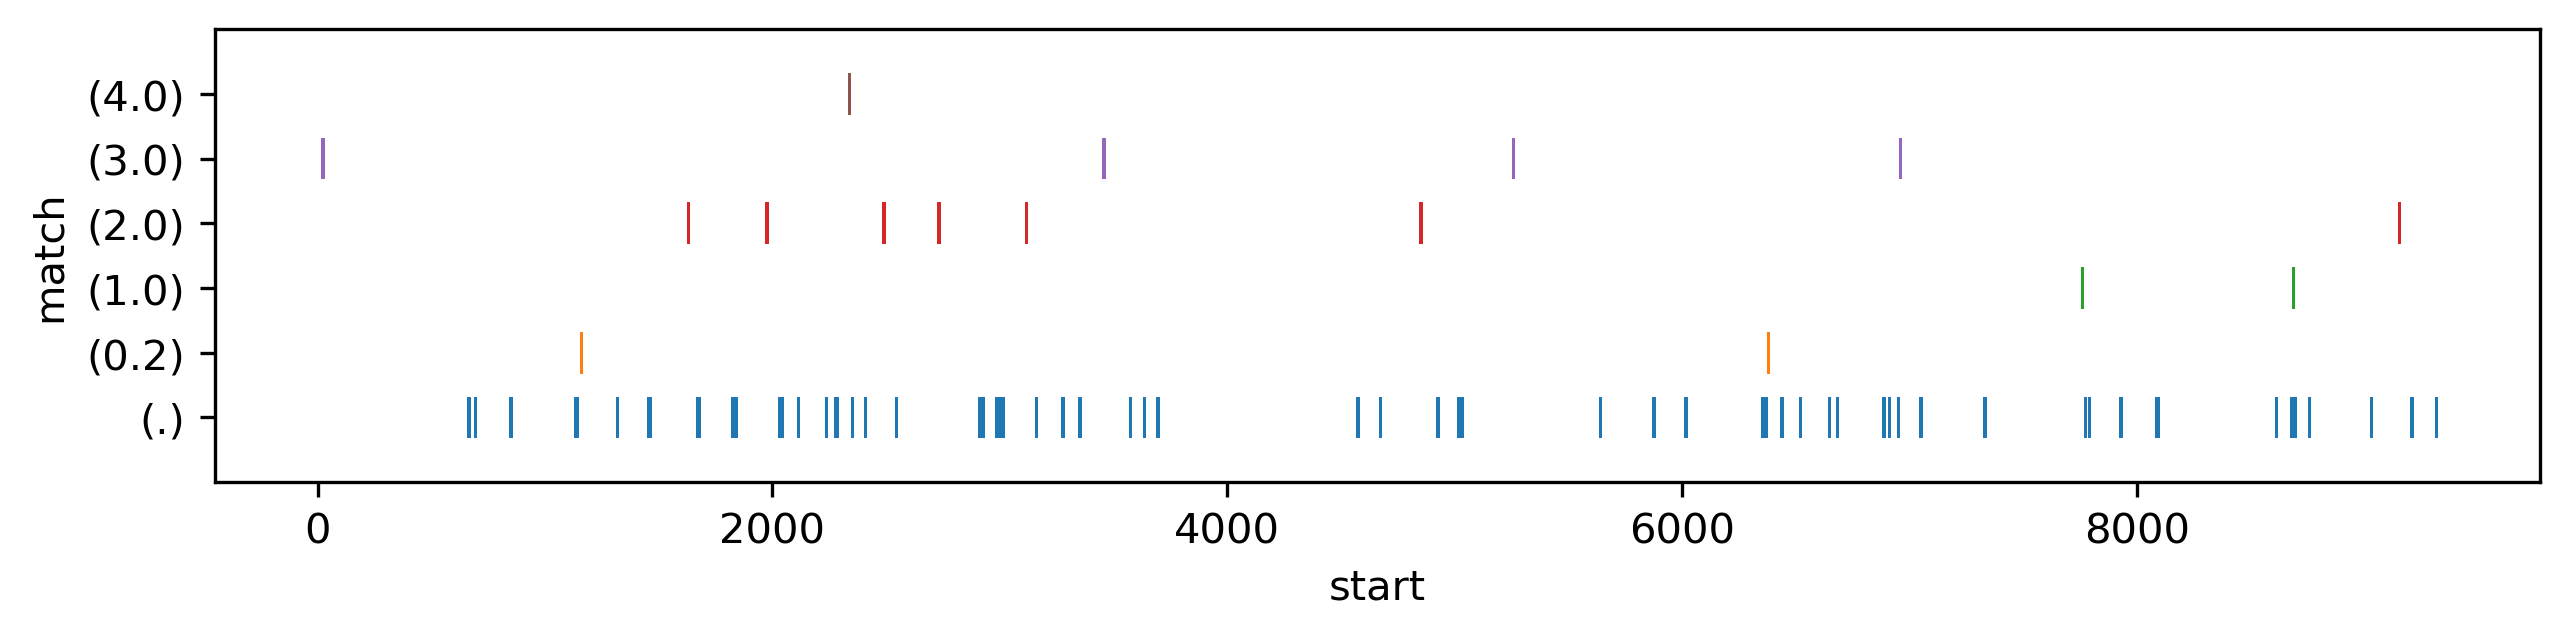

In [23]:
pause_timeline(pauses_df)

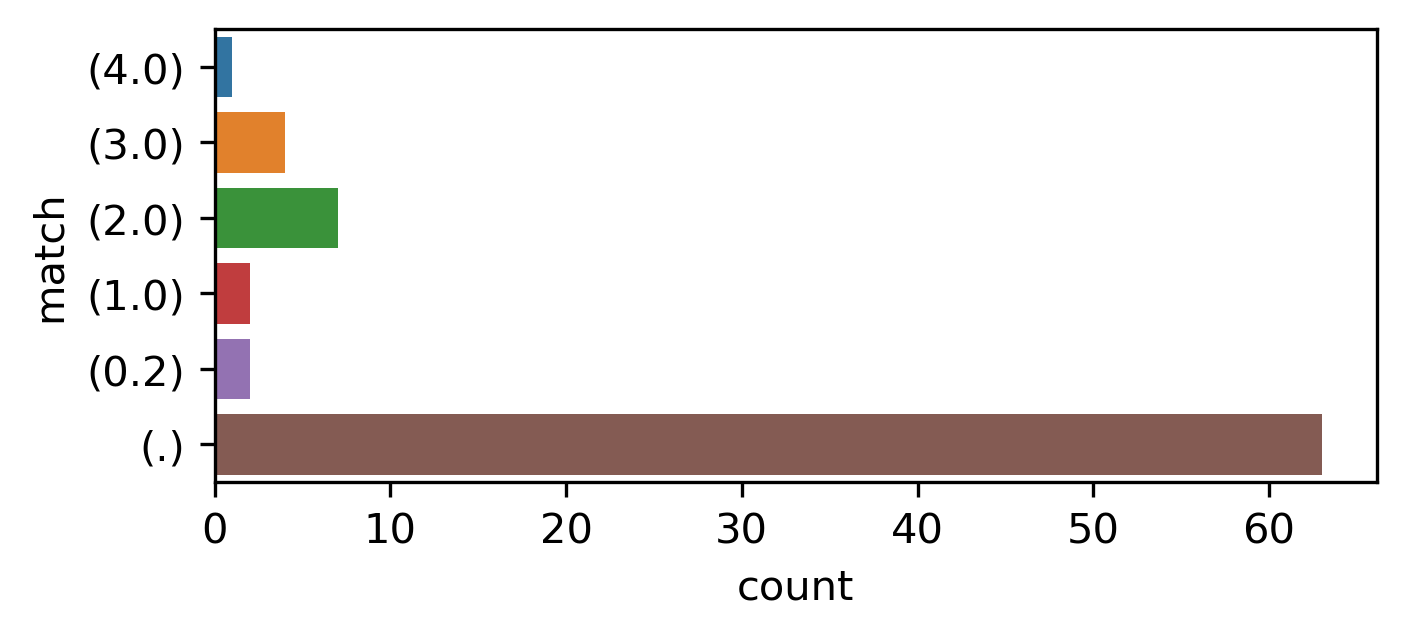

In [24]:
def pause_counts(df):
    pause_types = list(set(list(df['match'])))
    pause_types.sort(key=sortnumber, reverse=True)
    fig = plt.figure(figsize=[5, len(pause_types)/3], dpi=300)
    p = sns.countplot(data = df, y = 'match', order=pause_types)
    plt.savefig(path + 'plots/pause-counts.pdf', bbox_inches='tight')
#     p.set_ylim([-1,len(pause_types)])

pause_counts(pauses_df)

## Visualizing Intonations
We use an approach similar to visualizing the pauses above to count and visualize upward (↑) and downward (↓) intonations.

In [25]:
def get_intonations(transcript_str):
    regex=r"↑|↓"
    match_list = []
    for match in re.finditer(regex, transcript_text):
        match_list.append({'start' : match.span()[0], 'end' : match.span()[1], 'match' : match.group()})
    df = pd.DataFrame(match_list)
    return df

In [26]:
intonations_df = get_intonations(transcript_text)
intonations_df.sample(3)

,start,end,match
23,5026,5027,↓
5,1020,1021,↑
44,8619,8620,↑


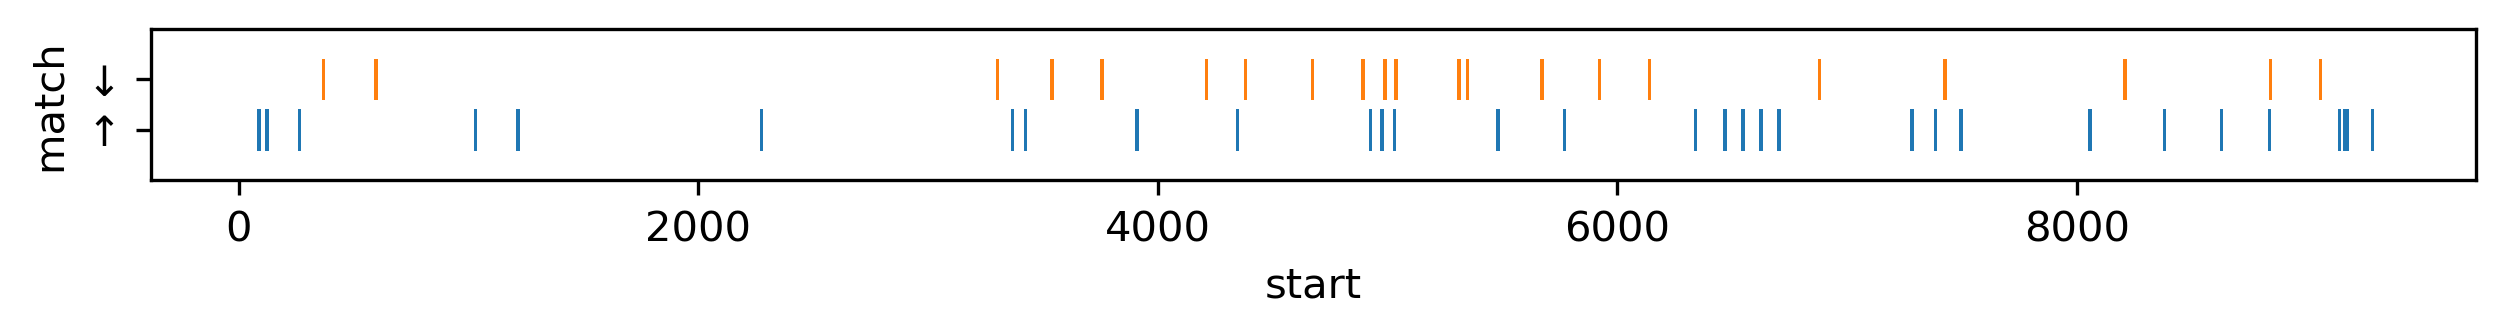

In [27]:
def intonation_timeline(df):
    intonation_types = list(set(list(df['match'])))
    fig = plt.figure(figsize=[10, len(intonation_types)/3], dpi=300)
    p = sns.stripplot(data = df, x = 'start', y = 'match',
                      s=10, marker="$\u007C$", jitter=False)
    p.set_ylim([-1,len(intonation_types)])
    plt.savefig(path + 'plots/intonation-timeline.pdf', bbox_inches='tight')

intonation_timeline(intonations_df)


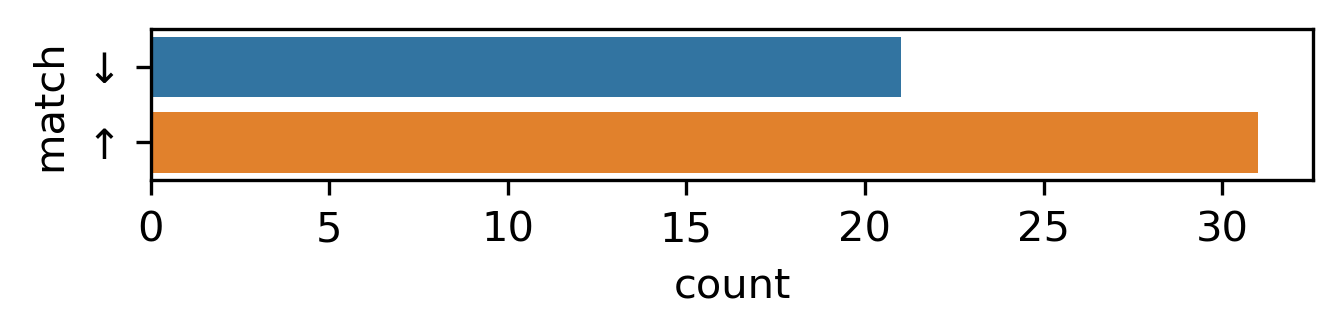

In [28]:
def intonation_counts(df):
    intonation_types = list(set(list(df['match'])))
    intonation_types.sort(reverse=True)
    fig = plt.figure(figsize=[5, len(intonation_types)/3], dpi=300)
    p = sns.countplot(data = df, y = 'match', order=intonation_types)
    plt.savefig(path + 'plots/intonation-counts.pdf', bbox_inches='tight')

intonation_counts(intonations_df)
